In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance

from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
plt.rcParams["figure.figsize"] = (28,24)
plt.rcParams.update({'font.size': 32})

# **K-Nearest Neighbors Algorithm**

**K-nearest neighbors is a non-parametric algorithm that can be utilized for classification or regression. For classification, the algorithm predicts the classification for a given input by finding the closest point or points to that input.**

**The algorithm requires a distance calculation to measure between points and the assumption that points that are close together are similar.**


<sup>Reference: [Machine Learning A Probabilistic Perspective by Kevin Murphy](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiossWtlvXyAhVvhOAKHaHYDNUQFnoECAQQAQ&url=http%3A%2F%2Fnoiselab.ucsd.edu%2FECE228%2FMurphy_Machine_Learning.pdf&usg=AOvVaw0ivnxQoBAr1Kn4BwTBbNxe)</sup>

<sup>Reference: [Data Science from Scratch First Principles with Python by Joel Grus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjO1s20-f7yAhW3GFkFHZwsBcEQFnoECAIQAQ&url=http%3A%2F%2Fmath.ecnu.edu.cn%2F~lfzhou%2Fseminar%2F%5BJoel_Grus%5D_Data_Science_from_Scratch_First_Princ.pdf&usg=AOvVaw3bJ0pcZM201kEXZjeTiLrr)</sup>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Python - k-nearest neighbors algorithm (kNN)!/nasa.csv')

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df['Hazard Dummies'] = pd.get_dummies(df['Hazardous'], drop_first=True)

In [ ]:
df.corr()['Hazard Dummies'].sort_values()

Orbit Uncertainity             -0.328721
Absolute Magnitude             -0.325522
Minimum Orbit Intersection     -0.288949
Neo Reference ID               -0.269028
Name                           -0.269028
Perihelion Distance            -0.207027
Epoch Date Close Approach      -0.079020
Orbital Period                 -0.011168
Semi Major Axis                -0.010770
Perihelion Arg                 -0.003865
Jupiter Tisserand Invariant    -0.003404
Inclination                     0.009607
Mean Motion                     0.013028
Asc Node Longitude              0.017536
Miss Dist.(Astronomical)        0.032407
Miss Dist.(miles)               0.032407
Miss Dist.(kilometers)          0.032407
Miss Dist.(lunar)               0.032407
Perihelion Time                 0.038113
Aphelion Dist                   0.040800
Epoch Osculation                0.040940
Mean Anomaly                    0.054164
Est Dia in Miles(min)           0.132424
Est Dia in KM(min)              0.132424
Est Dia in KM(ma

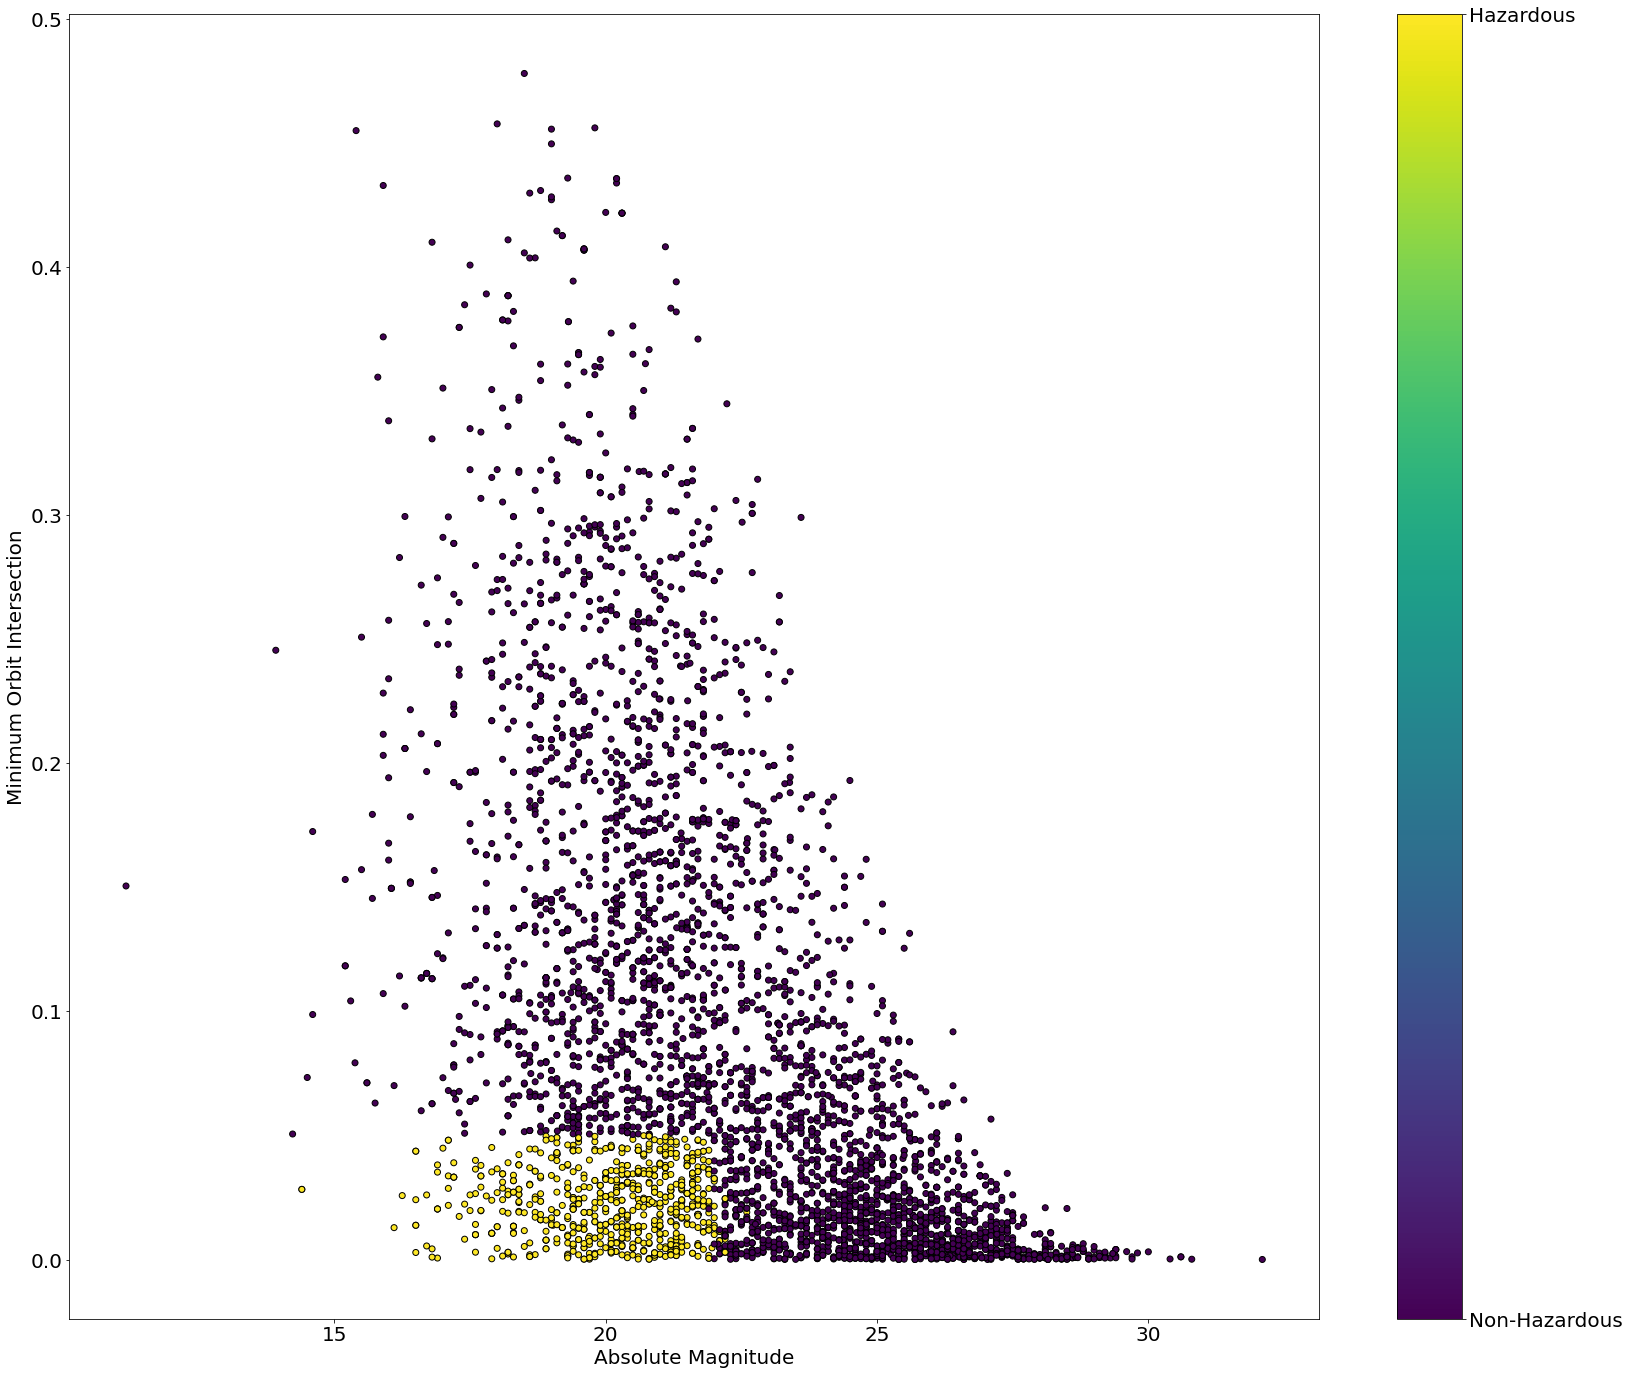

In [ ]:
plt.scatter(df['Absolute Magnitude'], df['Minimum Orbit Intersection'], c=df['Hazard Dummies'], edgecolors = 'black')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Minimum Orbit Intersection')
cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(['Non-Hazardous', 'Hazardous']);

## **KNN from scratch**

In [ ]:
df_features = df[['Absolute Magnitude', 'Minimum Orbit Intersection']]
df_target = df['Hazard Dummies']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25, random_state=10)

### **Euclidean Distance between 2 Points**

$d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}$

### **Small Data Set Example**

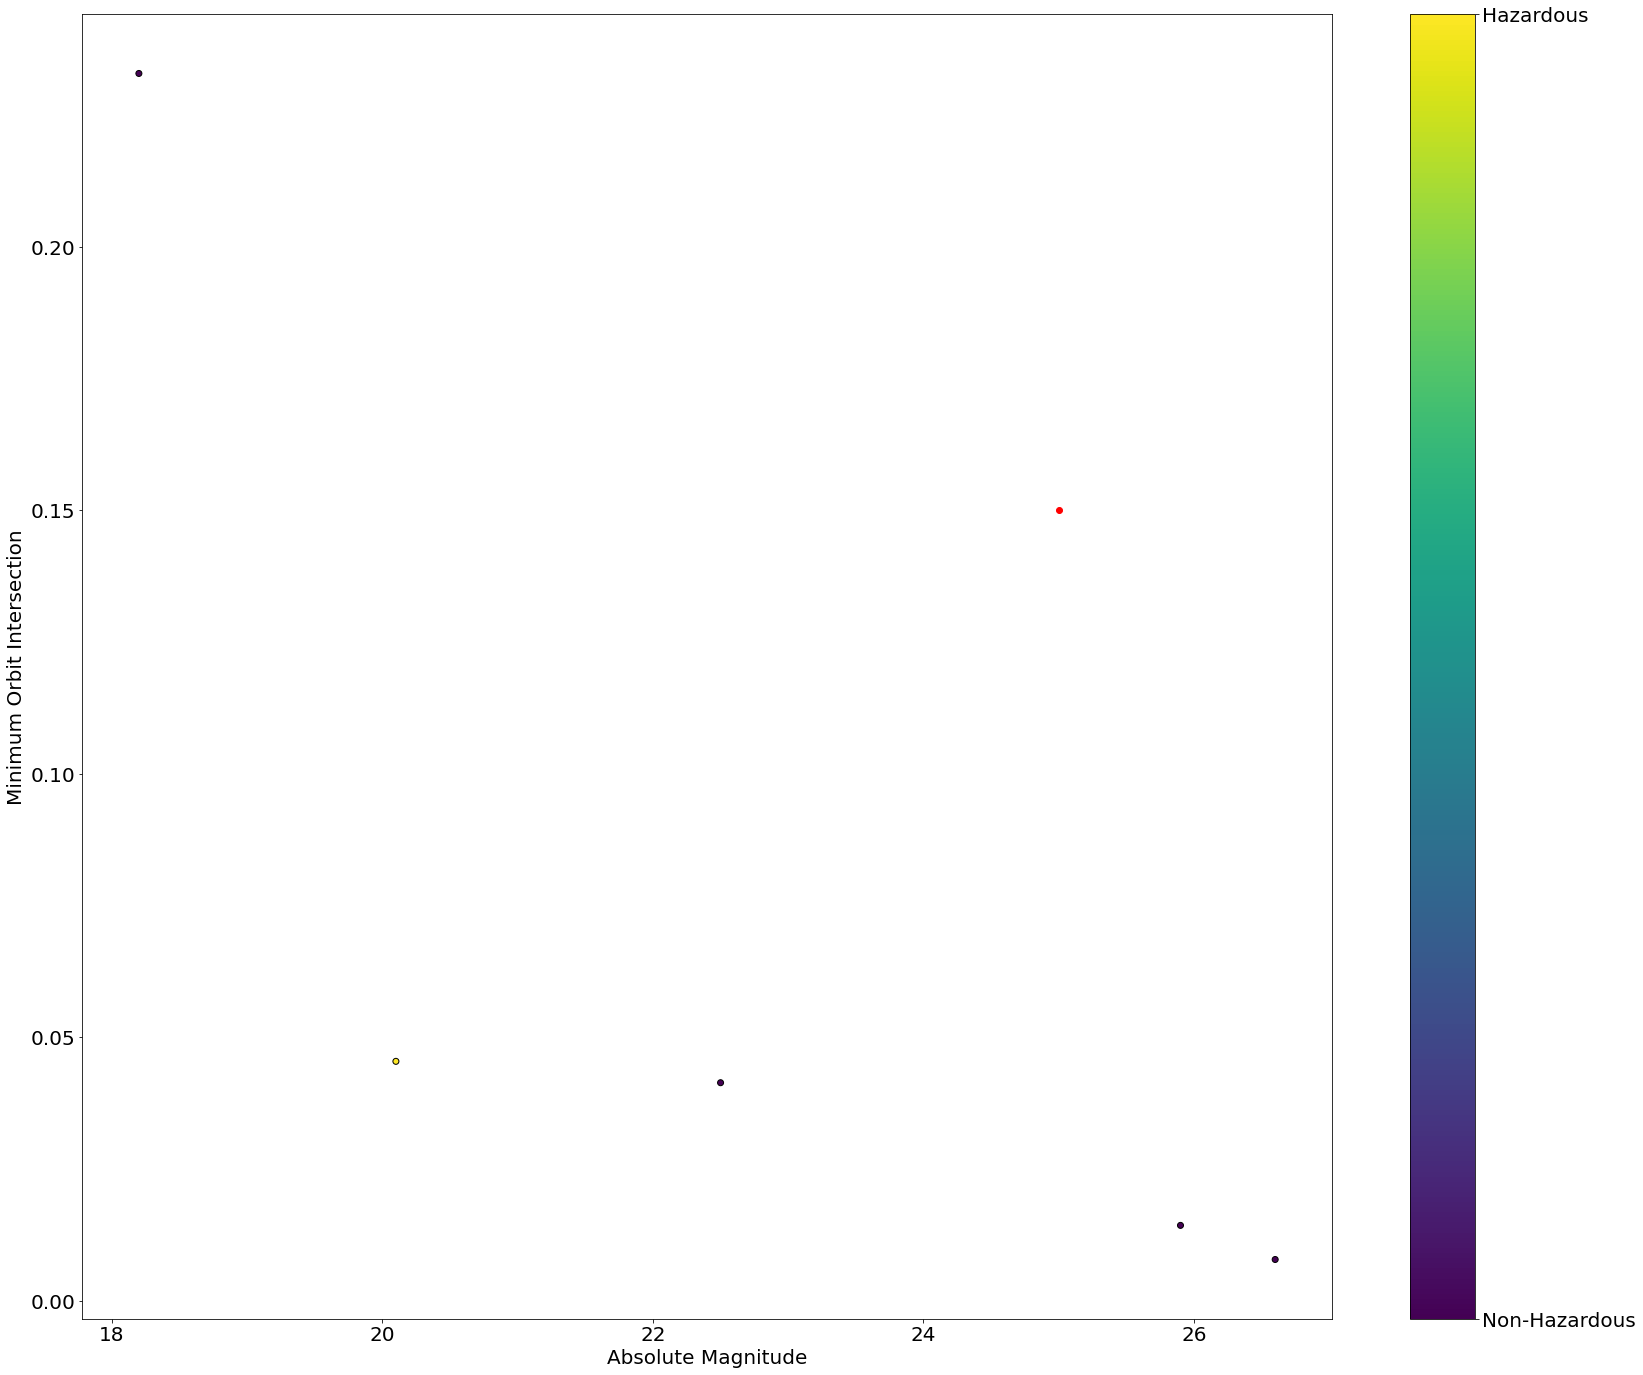

In [ ]:
x_i = 25
y_i = .15

plt.scatter(X_train['Absolute Magnitude'][-5:],X_train['Minimum Orbit Intersection'][-5:], c=y_train[-5:], edgecolors='black')
cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(['Non-Hazardous', 'Hazardous'])
plt.xlabel('Absolute Magnitude')
plt.ylabel('Minimum Orbit Intersection')
plt.scatter(x_i,y_i,c='red');

In [ ]:
example_list = []

for x,y,z in zip(X_train['Absolute Magnitude'][-5:], X_train['Minimum Orbit Intersection'][-5:],y_train[-5:]):
  example_list.append([((x_i-x)**2 + (y_i-y)**2)**.5,z])

In [ ]:
sorted(example_list)

[[0.9101766868946036, 0],
 [1.6063065807833838, 0],
 [2.5023599158498864, 0],
 [4.901116243042215, 1],
 [6.800504915476792, 0]]

### **Coding the KNN algorithm as a function**

In [ ]:
def knn(x_i,y_i,k):
  distance_list = []
  for x,y,z in zip(X_train['Absolute Magnitude'], X_train['Minimum Orbit Intersection'],y_train):
    distance_list.append([((x_i-x)**2 + (y_i-y)**2)**.5,z])
  distance_list = sorted(distance_list)
  distance_list = [x[1] for x in distance_list[:k]]
  return max(((item,distance_list.count(item))for item in set(distance_list)), key=lambda a:a[1])[0]

In [ ]:
knn(25,.15,3)

0

In [ ]:
knn(17.6, .04, 3)

1

### **Asteroid Data**

In [ ]:
predicted_value = []

for x,y in zip(X_test['Absolute Magnitude'], X_test['Minimum Orbit Intersection']):
  predicted_value.append(knn(x,y,3))

X_test['Predicted Hazard'] = predicted_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_test

,Absolute Magnitude,Minimum Orbit Intersection,Predicted Hazard
42,21.424,0.089036,0
2580,18.000,0.090858,0
1531,22.600,0.219768,0
1254,20.400,0.060338,0
3939,24.100,0.017367,0
...,...,...,...
1610,21.400,0.023258,1
2717,26.900,0.001903,0
2820,25.400,0.018021,0
1288,17.600,0.039945,1


#### **Measuring how well KNN predicts values**

$\text{Accuracy Score =} \frac{\text{True Positive }+\text{ True Negative}}{\text{Total Number of Observed Values}}$

In [ ]:
accuracy_score(X_test['Predicted Hazard'],y_test)

0.9906143344709898

## **KNN using Scikit-Learn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train['Hazards'] = y_train
knn_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors=knn_neighbors)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.9906143344709898

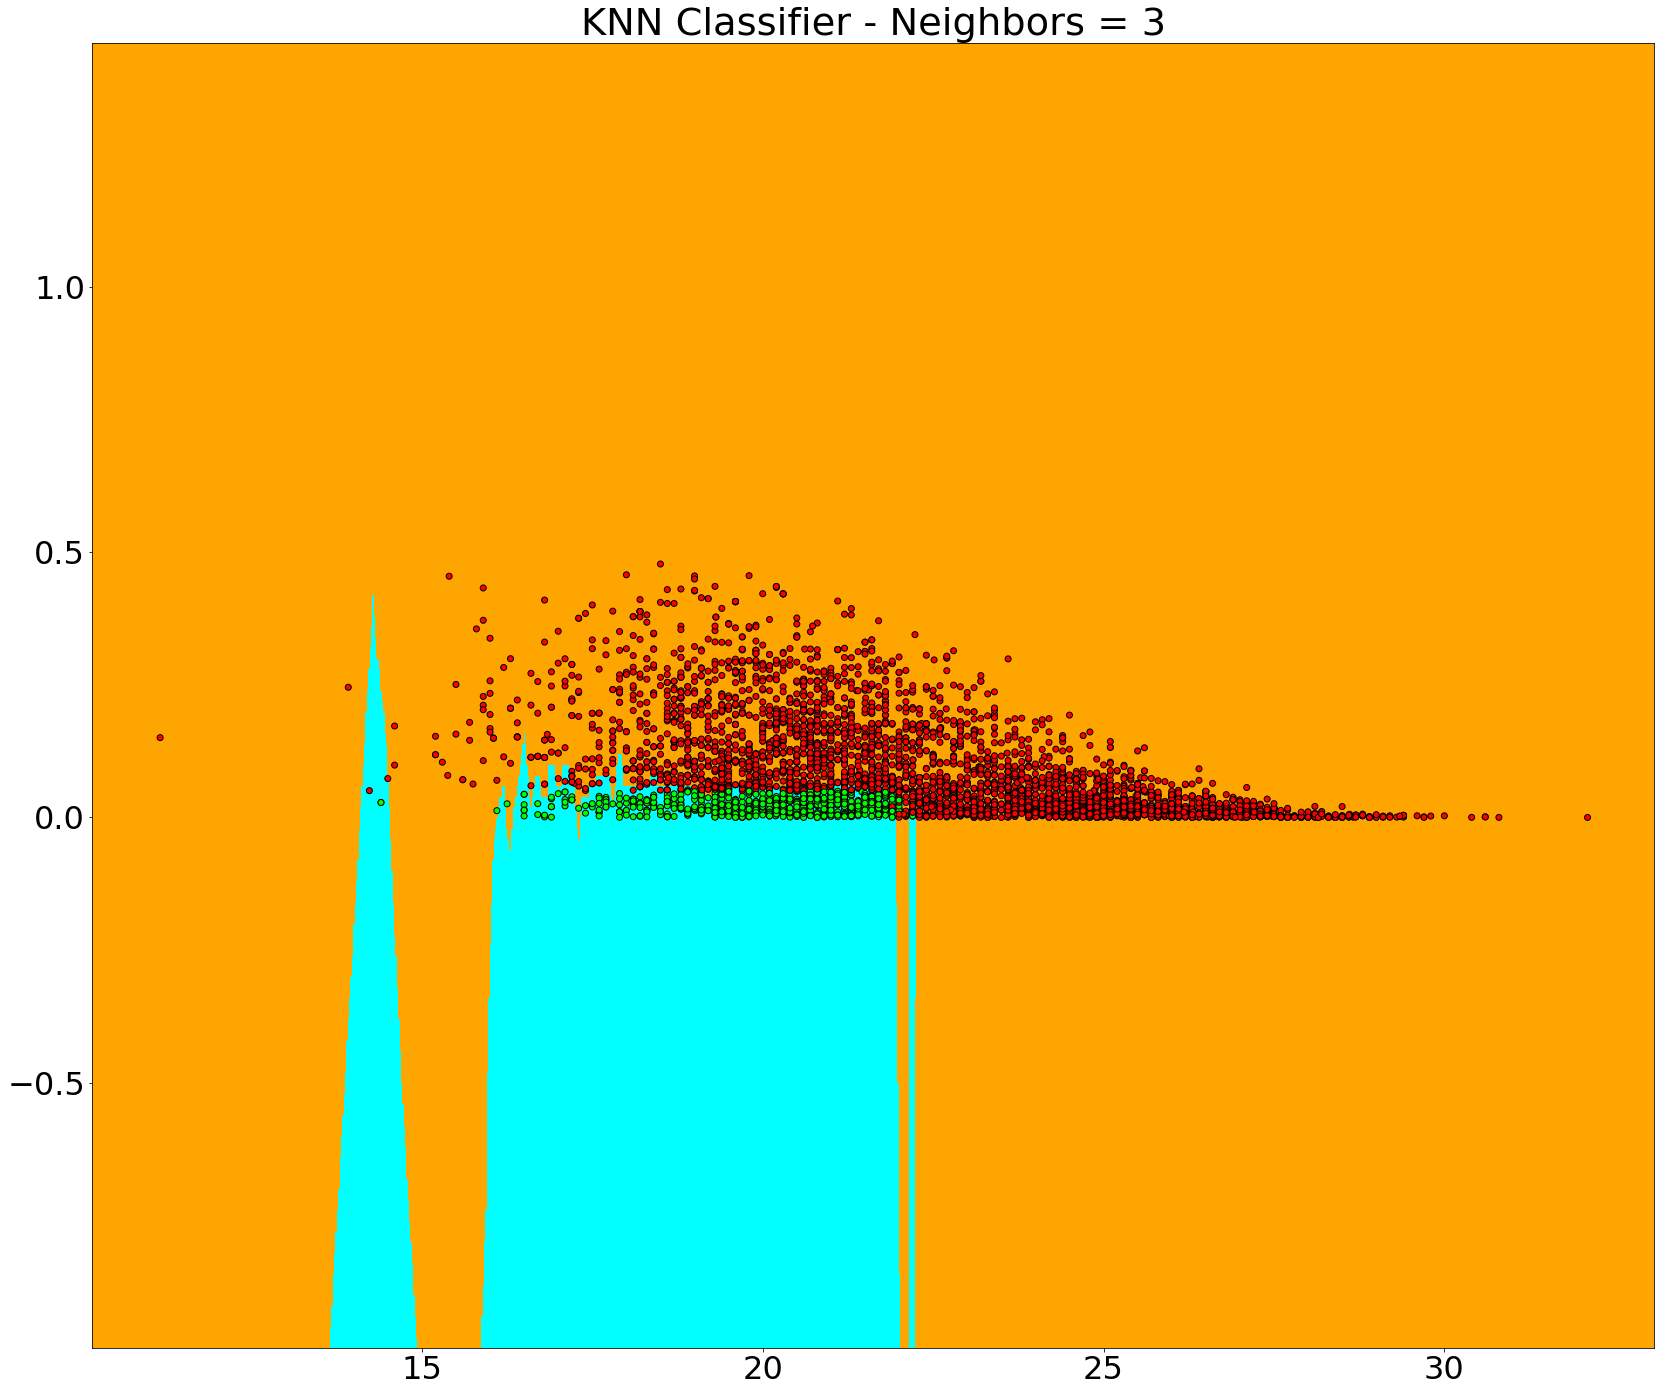

In [ ]:
X = df_features.to_numpy()
y = df_target.to_numpy()

cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

classifier.fit(X,y)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'KNN Classifier - Neighbors = {knn_neighbors}')
plt.show()

<sup>Source: [Nearest Neighbors Classification from scikit-learn](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)</sup>

# **Issues with KNN**

**There are two significant drawbacks to the KNN algorithm.**

**1. The algorithm suffers from the "curse of dimensionality", meaning that the algorithm cannot handle data sets with a large number of features well.**

**2. The KNN algorithm is slow at classifying variables relative to other algorithms.**

## **Curse of dimensionality**

### **Euclidean Distance for higher dimensions**

$d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_i - p_i)^2 + ... + (q_n - p_n)^2}$

In [ ]:
distance_list = []

for dim in range(2,100):
  dist = []
  while len(dist) < 1000:
    dist.append(distance.euclidean(np.random.random_sample(dim), np.random.random_sample(dim)))
  distance_list.append([dim, np.mean(dist), min(dist)])

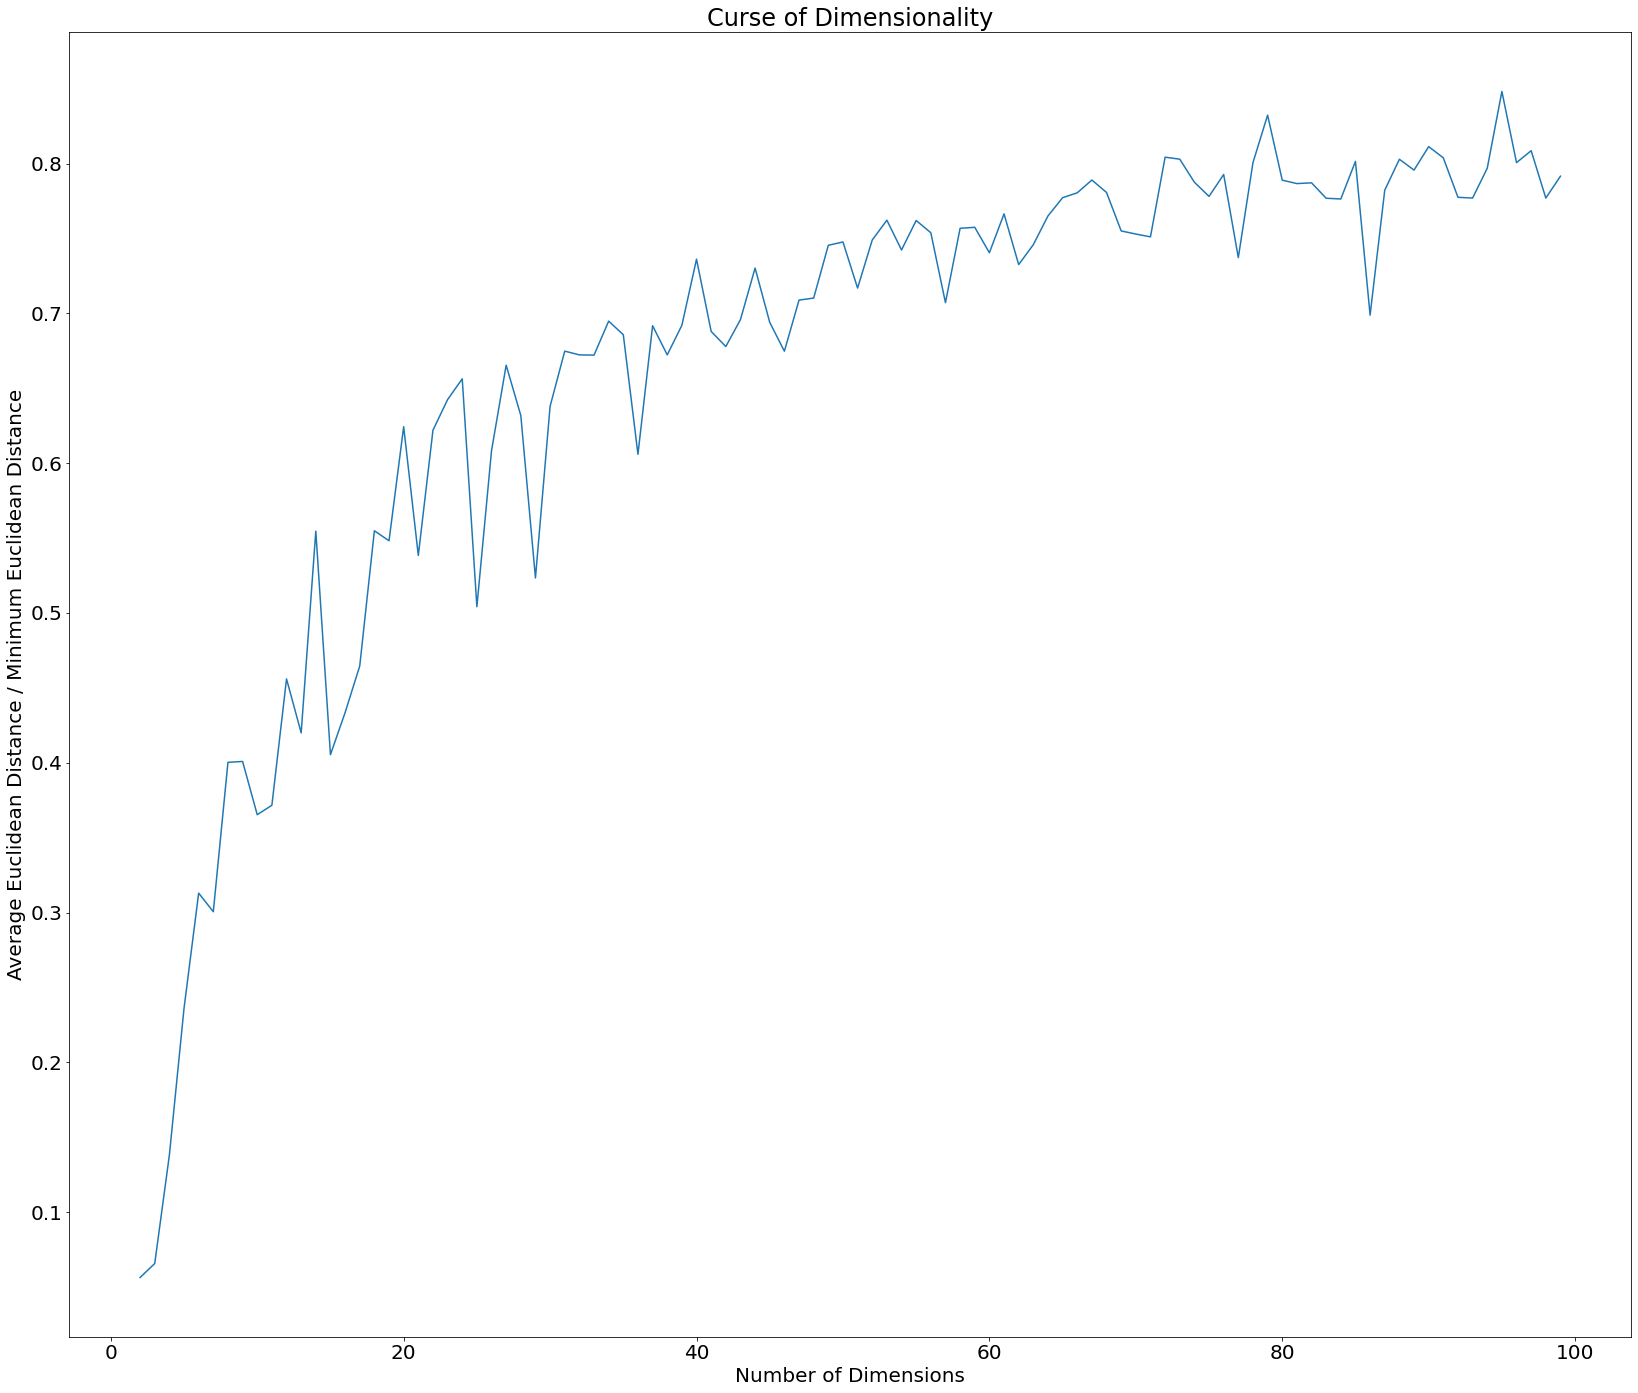

In [ ]:
plt.plot([x[0] for x in distance_list], [y[2]/y[1] for y in distance_list])
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Euclidean Distance / Minimum Euclidean Distance')
plt.title('Curse of Dimensionality');

<sup>Reference: [Data Science from Scratch First Principles with Python by Joel Grus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjO1s20-f7yAhW3GFkFHZwsBcEQFnoECAIQAQ&url=http%3A%2F%2Fmath.ecnu.edu.cn%2F~lfzhou%2Fseminar%2F%5BJoel_Grus%5D_Data_Science_from_Scratch_First_Princ.pdf&usg=AOvVaw3bJ0pcZM201kEXZjeTiLrr)</sup>

## **Comparing Time to Run**

In [ ]:
df_malware = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Python - k-nearest neighbors algorithm (kNN)!/microsoft_malware.csv')

In [ ]:
df_malware

,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuild,AutoSampleOptIn,Census_HasOpticalDiskDrive,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,HasDetections,ProductName_mse,ProductName_win8defender,Platform_windows10,Platform_windows2016,Platform_windows7,Platform_windows8,Processor_arm64,Processor_x64,Processor_x86,OsVer_10.0.0.0,OsVer_10.0.1.0,OsVer_10.0.1.44,OsVer_10.0.2.0,OsVer_10.0.3.0,OsVer_10.0.32.72,OsVer_6.1.0.0,OsVer_6.1.1.0,OsVer_6.1.3.0,OsVer_6.3.0.0,OsVer_6.3.1.0,OsSuite_16,OsSuite_256,OsSuite_272,OsSuite_305,OsSuite_400,OsSuite_768,OsSuite_784,Census_DeviceFamily_Windows.Desktop,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_amd64,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_OSEdition_Cloud,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,Census_OSEdition_CoreN,Census_OSEdition_CoreSingleLanguage,Census_OSEdition_Education,Census_OSEdition_EducationN,Census_OSEdition_Enterprise,Census_OSEdition_EnterpriseN,Census_OSEdition_EnterpriseS,Census_OSEdition_EnterpriseSN,Census_OSEdition_Professional,Census_OSEdition_ProfessionalEducation,Census_OSEdition_ProfessionalEducationN,Census_OSEdition_ProfessionalN,Census_OSEdition_ServerDatacenterEval,Census_OSEdition_ServerSolution,Census_OSEdition_ServerStandard,Census_OSEdition_ServerStandardEval,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN
0,0,0,1,29,171,17134,0,0,17134,165,119,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,1,93,64,17134,0,0,17134,1,31,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,86,49,17134,0,0,17134,165,30,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,88,115,17134,0,0,17134,228,64,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,18,75,17134,0,0,17134,191,31,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,1,177,239,10240,0,0,10240,17443,140,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
99996,0,0,1,206,74,17134,0,1,17134,167,31,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
99997,0,0,1,93,75,16299,0,0,16299,611,30,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
99998,0,0,1,29,171,17134,0,0,17134,228,119,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_malware_features = df_malware.drop('HasDetections', axis=1)
df_malware_target = df_malware['HasDetections']

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(df_malware_features, df_malware_target, test_size=0.25, random_state=10)

In [ ]:
#%%timeit
#classifier.fit(X_train_m, y_train_m)
#y_pred_m = classifier.predict(X_test_m)

In [ ]:
%%timeit
d_tree.fit(X_train_m, y_train_m)
y_pred_m = d_tree.predict(X_test_m)

1 loop, best of 5: 1.06 s per loop


In [ ]:
%%timeit
gnb.fit(X_train_m, y_train_m)
y_pred_m = gnb.predict(X_test_m)

1 loop, best of 5: 174 ms per loop


# **References and Additional Learning**

## **Data Sets**

- **[NASA JPL Asteroid Data set from Kaggle](https://www.kaggle.com/sakhawat18/asteroid-dataset)**

- **[Microsoft Malware Data Set from Kaggle](https://www.kaggle.com/c/microsoft-malware-prediction)**

## **Textbooks**

- **[Machine Learning A Probabilistic Perspective by Kevin Murphy](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiossWtlvXyAhVvhOAKHaHYDNUQFnoECAQQAQ&url=http%3A%2F%2Fnoiselab.ucsd.edu%2FECE228%2FMurphy_Machine_Learning.pdf&usg=AOvVaw0ivnxQoBAr1Kn4BwTBbNxe)**

- **[Understanding Machine Learning:
From Theory to Algorithms](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf)**

- **[Data Science from Scratch First Principles with Python by Joel Grus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjO1s20-f7yAhW3GFkFHZwsBcEQFnoECAIQAQ&url=http%3A%2F%2Fmath.ecnu.edu.cn%2F~lfzhou%2Fseminar%2F%5BJoel_Grus%5D_Data_Science_from_Scratch_First_Princ.pdf&usg=AOvVaw3bJ0pcZM201kEXZjeTiLrr)**

## **Videos**

- **[StatQuest: K-nearest neighbors, Clearly Explained by Josh Starmer](https://www.youtube.com/watch?v=HVXime0nQeI&t=219s)**

- **[K-Nearest Neighbor by ritvikmath](https://www.youtube.com/watch?v=UR2ag4lbBtc&t=196s)**